In [1]:
#Noah Laraway
#IST 652
#Real Estate Analysis Project


In [2]:
#Import modules
import csv
import json
import dataframe_image as dfi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import to_datetime
import warnings
warnings.filterwarnings("ignore")


# Import Denver real estate data and inspect

In [3]:
#Import Denver real estate sales csv
denverdf = pd.read_csv('Files/denver_property_sales_updated.csv')

In [4]:
#Show Denver data frame to inspect
dfi.export(denverdf.head(10), "../Project/images/Tables/denverdf_raw_data.png")
denverdf

,PARID,SALE_YEAR,SALE_MONTHDAY,SALE_PRICE,D_CLASS,D_CLASS_N,NBHD_1,NBHD_1_CN
0,3.100014e+09,2017,720,12500000,70,DRY FARM LAND,4,GATEWAY N
1,3.100015e+09,2017,720,12500000,70,DRY FARM LAND,4,GATEWAY N
2,3.100016e+09,2017,720,12500000,70,DRY FARM LAND,4,GATEWAY N
3,3.100025e+09,2015,120,9350000,223,COMMERCIAL-HOTEL,4,GATEWAY N
4,3.100028e+09,2011,1102,5400000,28T,COMMERCIAL-MISC IMPS,4,GATEWAY N
...,...,...,...,...,...,...,...,...
321249,9.154010e+11,2018,524,215000,103,RESIDENTIAL-CONDOMINIUM,905,GRANT RN/MARST
321250,9.154010e+11,2020,612,10,103,RESIDENTIAL-CONDOMINIUM,905,GRANT RN/MARST
321251,9.154010e+11,2015,420,120000,103,RESIDENTIAL-CONDOMINIUM,905,GRANT RN/MARST
321252,9.154010e+11,2015,727,155000,103,RESIDENTIAL-CONDOMINIUM,905,GRANT RN/MARST


In [5]:
#Check data types
denverdf.dtypes

PARID            float64
SALE_YEAR          int64
SALE_MONTHDAY      int64
SALE_PRICE         int64
D_CLASS           object
D_CLASS_N         object
NBHD_1             int64
NBHD_1_CN         object
dtype: object

# Clean Denver df

In [6]:
#Reduce data frame to only contain sales for single family homes(i.e. remove commercial/etc.. sales)
#Filter by single family home codes ('113', '114', '115', '116', '117', '118', '119')

denverdf = denverdf[(denverdf.D_CLASS == '113') | (denverdf.D_CLASS == '114') | (denverdf.D_CLASS == '115')  | 
                    (denverdf.D_CLASS == '116') | (denverdf.D_CLASS == '117') | (denverdf.D_CLASS == '118')  | 
                    (denverdf.D_CLASS == '119') ]



In [7]:
#Remove low sale prices (Some are 0 or $10)
denverdf = denverdf[denverdf.SALE_PRICE > 1000] 

In [8]:
#Remove unecessary columns
denverdf = denverdf.drop(columns=["PARID", "SALE_MONTHDAY", "D_CLASS_N", "NBHD_1"])

In [9]:
#Rename Columns
denverdf.columns = ['Year', 'Sales_Price', 'Property_Code', 'Neighborhood']

In [10]:
dfi.export(denverdf.head(10), "../Project/images/Tables/denverdf_cleaned_data.png")
denverdf

,Year,Sales_Price,Property_Code,Neighborhood
154,2020,9000000,113,GATEWAY N
155,2021,364620,113,GATEWAY N
157,2020,9000000,113,GATEWAY N
158,2021,320355,113,GATEWAY N
160,2020,9000000,113,GATEWAY N
...,...,...,...,...
320999,2021,668000,115,GRANT RN/MARST
321000,2013,559000,115,GRANT RN/MARST
321001,2014,650000,115,GRANT RN/MARST
321002,2015,512500,115,GRANT RN/MARST


# Create additional data frames from Denver df for further analysis 

In [11]:
#Use groupby to show median sales price for each year
denver_groupby_year = denverdf.groupby('Year')['Sales_Price'].median().astype(int)
denver_median_yeardf = denver_groupby_year.reset_index().set_index('Year')
dfi.export(denver_median_yeardf, "../Project/images/Tables/denver_median_yeardf.png")
denver_median_yeardf


,Sales_Price
Year,
2010,239900
2011,234950
2012,271600
2013,320000
2014,325000
2015,371000
2016,407500
2017,432500
2018,461837


In [12]:
#Use groupby to show median sales price for each neighborhood
groupby_neigh = denverdf.groupby('Neighborhood')['Sales_Price'].median().astype(int)
denver_median_neighdf = groupby_neigh.reset_index().set_index('Neighborhood')
dfi.export(denver_median_neighdf.head(10), "../Project/images/Tables/denver_median_neighdf.png")
denver_median_neighdf

,Sales_Price
Neighborhood,
ACADEMY,325000
ARAPAHOE SQUARE,408000
ATHMAR PARK,242500
AVONDALE,365000
BAKER,425500
...,...
WESTWOOD,190000
WHITTIER,414100
WILLOW POINT E,424950


# Import US data and inspect

In [13]:
#Import US real estate sales excel file
usdf = pd.read_excel (r'Files/US_soldprice_cust.xls', sheet_name='SoldMedAvgPriceDet')


In [14]:
#Show US data frame to inspect
dfi.export(usdf.head(10), "../Project/images/Tables/usdf_raw_data.png")
usdf

,Median and Average Sales Prices of New Detached Single-Family Houses Sold,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,[Medians and averages computed from unrounded ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Median Sales Price,NaN,NaN,NaN,NaN,Average Sales Price,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Region,NaN,NaN,NaN,NaN,Region,NaN,NaN
4,NaN,United,North-,NaN,NaN,NaN,United,North-,NaN,NaN,NaN
5,Year,States,east,Midwest,South,West,States,east,Midwest,South,West
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1999,162400,231000,171000,146600,175200,198800,270200,192700,174400,224300
8,2000,171800,256600,177200,148000,197000,210500,306200,205800,179900,241600
9,2001,179900,279700,182000,156800,214200,217700,335900,210900,186600,252900


In [15]:
#Check data types
usdf.dtypes

Median and Average Sales Prices of New Detached Single-Family Houses Sold     object
Unnamed: 1                                                                    object
Unnamed: 2                                                                    object
Unnamed: 3                                                                    object
Unnamed: 4                                                                    object
Unnamed: 5                                                                    object
Unnamed: 6                                                                    object
Unnamed: 7                                                                    object
Unnamed: 8                                                                    object
Unnamed: 9                                                                    object
Unnamed: 10                                                                   object
dtype: object

# Clean US data frame

In [16]:
#Drop unecessary rows
usdf = usdf.drop(range(29,39))
usdf = usdf.drop(range(0,7))

In [17]:
#Drop Unecessary columns
usdf = usdf.drop(columns=["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9","Unnamed: 10"])

In [18]:
#Rename Columns
usdf.columns = ['Year', 'US', 'Northeast', 'Midwest', 'South', 'West']

In [19]:
#Change data type for price columns to integer
usdf['US'] = usdf['US'].astype(int)
usdf['Northeast'] = usdf['Northeast'].astype(int)
usdf['Midwest'] = usdf['Midwest'].astype(int)
usdf['South'] = usdf['South'].astype(int)
usdf['West'] = usdf['West'].astype(int)

In [20]:
usdf.dtypes

Year         object
US            int32
Northeast     int32
Midwest       int32
South         int32
West          int32
dtype: object

In [21]:
dfi.export(usdf.head(10), "../Project/images/Tables/usdf_clean_data.png")
usdf

,Year,US,Northeast,Midwest,South,West
7,1999,162400,231000,171000,146600,175200
8,2000,171800,256600,177200,148000,197000
9,2001,179900,279700,182000,156800,214200
10,2002,192900,293300,190100,162900,242900
11,2003,201800,297000,201700,168400,264200
12,2004,224900,329600,217200,179700,289500
13,2005,248300,378400,230000,196000,343700
14,2006,253600,370300,226900,206300,347400
15,2007,251400,340600,221500,215500,342300
16,2008,237500,336000,208700,204100,305100


# Begin analysis to answer questions

### How have home prices in Denver and the US changed over time(2010-2020)?

In [22]:
#Merge usdf and denver_median_yeardf by year
merged_df = denver_median_yeardf.merge(usdf, left_on='Year', right_on='Year')

In [23]:
#Change column name for Sales_Price to Denver and set index to year
merged_df = merged_df.rename(columns = {'Sales_Price' : 'Denver'})
merged_df2 = merged_df.set_index('Year')
dfi.export(merged_df2, "../Project/images/Tables/usdf_denver_merged_data.png")
merged_df2

,Denver,US,Northeast,Midwest,South,West
Year,,,,,,
2010,239900,224000,353300,203900,194900,260100
2011,234950,227800,346200,210500,212000,255300
2012,271600,245100,407200,231300,226500,270400
2013,320000,271900,427600,260500,246800,314800
2014,325000,290600,447800,279300,262600,340800
2015,371000,294800,463100,281300,271600,348400
2016,407500,310000,459000,285900,281000,376000
2017,432500,323000,534100,284100,288900,391000
2018,461837,324900,479000,297300,290100,414200


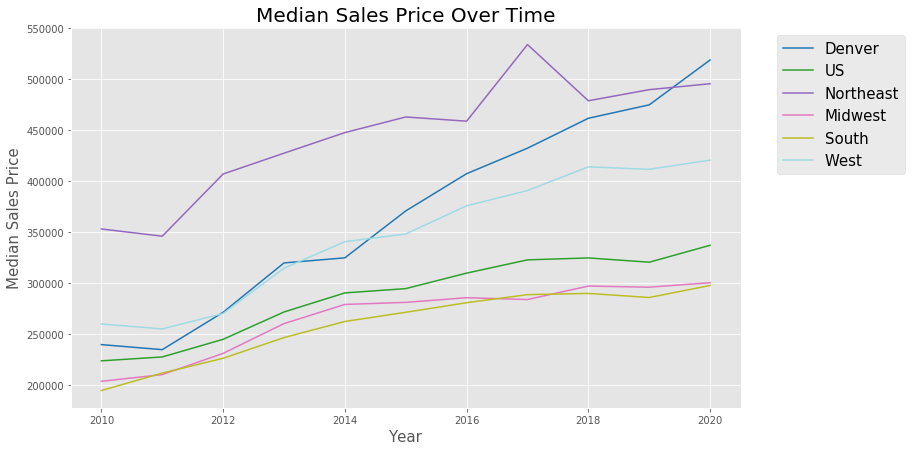

In [24]:
#Create line plot of median sales price
plt.style.use('ggplot')
median_year_plot = merged_df2.plot.line(figsize =(12,7),cmap='tab20')
plt.ylabel('Median Sales Price', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Median Sales Price Over Time', fontsize=20)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper center',labels=['Denver','US','Northeast','Midwest','South',
                                                               'West'], fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)          
plt.savefig("../Project/images/Plots/median_sales_price_plot.png", bbox_inches='tight')

In [25]:
#Create data frame for % Change by year compared to 2010
merged_df2['Denver%_Change'] = (merged_df2['Denver']-merged_df2.iloc[0]['Denver'])/merged_df2.iloc[0]['Denver']*100
merged_df2['US%_Change'] = (merged_df2['US']-merged_df2.iloc[0]['US'])/merged_df2.iloc[0]['US']*100
merged_df2['Northeast%_Change'] = (merged_df2['Northeast']-merged_df2.iloc[0]['Northeast'])/merged_df2.iloc[0]['Northeast']*100
merged_df2['Midwest%_Change'] = (merged_df2['Midwest']-merged_df2.iloc[0]['Midwest'])/merged_df2.iloc[0]['Midwest']*100
merged_df2['South%_Change'] = (merged_df2['South']-merged_df2.iloc[0]['South'])/merged_df2.iloc[0]['South']*100
merged_df2['West%_Change'] = (merged_df2['West']-merged_df2.iloc[0]['West'])/merged_df2.iloc[0]['West']*100
merged_df3 = merged_df2.drop(columns=["Denver", "US", "Northeast", "Midwest","South", "West"])
dfi.export(merged_df3, "../Project/images/Tables/usdf_denver_merged2_data.png")
merged_df3

,Denver%_Change,US%_Change,Northeast%_Change,Midwest%_Change,South%_Change,West%_Change
Year,,,,,,
2010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011,-2.063360,1.696429,-2.009624,3.236881,8.773730,-1.845444
2012,13.213839,9.419643,15.256156,13.437960,16.213443,3.960015
2013,33.388912,21.383929,21.030286,27.758705,26.629041,21.030373
2014,35.473114,29.732143,26.747806,36.978911,34.735762,31.026528
2015,54.647770,31.607143,31.078404,37.959784,39.353515,33.948481
2016,69.862443,38.392857,29.917917,40.215792,44.176501,44.559785
2017,80.283451,44.196429,51.174639,39.333006,48.229861,50.326797
2018,92.512297,45.044643,35.578828,45.806768,48.845562,59.246444


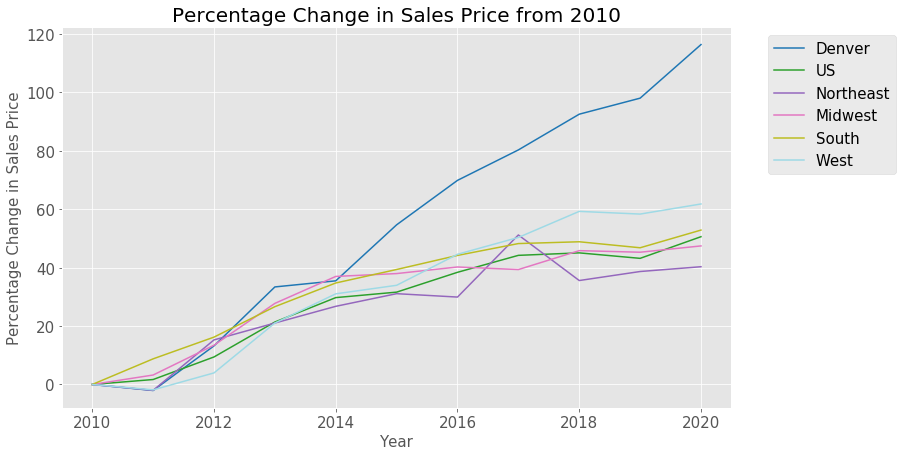

In [26]:
#Create line plot of percent increase in median sales price 
plt.style.use('ggplot')
percentage_year_plot = merged_df3.plot.line(figsize =(12,7),cmap='tab20')
plt.ylabel('Percentage Change in Sales Price', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('Percentage Change in Sales Price from 2010', fontsize=20)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper center',labels=['Denver','US','Northeast','Midwest','South',
                                                               'West'], fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/median_sales_percentage_plot.png", bbox_inches='tight')

# What were the top 10 neighborhoods in Denver by change in sales price over time (2010-2021)?

In [27]:
#Use groupby to show median sales price for each neighborhood by year. Then sort by Neighborhood and year
groupby_neigh2 = denverdf.groupby(['Year', 'Neighborhood'])['Sales_Price'].median().astype(int)
denver_median_neighdf2 = groupby_neigh2.reset_index().sort_values(by=['Neighborhood', 'Year'])
denver_median_neighdf2

,Year,Neighborhood,Sales_Price
0,2010,ACADEMY,194950
144,2011,ACADEMY,209625
293,2012,ACADEMY,200000
443,2013,ACADEMY,217000
594,2014,ACADEMY,270000
...,...,...,...
1203,2017,ZUNI PARK,341500
1355,2018,ZUNI PARK,345000
1506,2019,ZUNI PARK,370000
1661,2020,ZUNI PARK,414300


In [28]:
#Create data frame that filters to only 2010 prices and removes the year column 
#and change sales_price to 2010 sales price
denver_2010_mediandf = denver_median_neighdf2[denver_median_neighdf2.Year == 2010]
denver_2010_mediandf = denver_2010_mediandf.rename(columns = {'Sales_Price' : '2010_Sales_Price'})
denver_2010_mediandf = denver_2010_mediandf.drop(columns="Year")
        
#Create data frame that filters to only 2021 prices and removes the year column 
#and change sales_price to 2021 sales price       
denver_2021_mediandf = denver_median_neighdf2[denver_median_neighdf2.Year == 2021]
denver_2021_mediandf = denver_2021_mediandf.rename(columns = {'Sales_Price' : '2021_Sales_Price'})
denver_2021_mediandf = denver_2021_mediandf.drop(columns="Year")           
   
#Merge dataframes on neighborhood to combine 2010 and 2021 sales price columns
denver_merged_df = denver_2010_mediandf.merge(denver_2021_mediandf, left_on='Neighborhood', right_on='Neighborhood')    

#Add columns for $ and % change in price
denver_merged_df['$Change'] = denver_merged_df['2021_Sales_Price'] - denver_merged_df['2010_Sales_Price']  
denver_merged_df['%Change'] = (denver_merged_df['$Change']/denver_merged_df['2010_Sales_Price'] *100).astype(int)
        

In [29]:
#Find the top 10 neighborhood by overall change in price
top10_denver_neigh_byPrice_df = denver_merged_df.set_index('Neighborhood').sort_values(by='$Change', ascending=False).head(10)
dfi.export(top10_denver_neigh_byPrice_df, "../Project/images/Tables/denver_top10_neighborhoods_data.png")
top10_denver_neigh_byPrice_df 

,2010_Sales_Price,2021_Sales_Price,$Change,%Change
Neighborhood,,,,
BELCARO,822250,2370000,1547750,188
COUNTRY CLUB,1713000,3063750,1350750,78
POLO FIELD,1150000,2173905,1023905,89
WASHINGTON PK,520000,1430250,910250,175
MONACO PKWY,418750,1225000,806250,192
CHEESMAN PARK,425000,1225000,800000,188
BONNIE BRAE,515031,1306750,791719,153
HILLTOP,757500,1520000,762500,100
PARKWAY,500000,1250000,750000,150


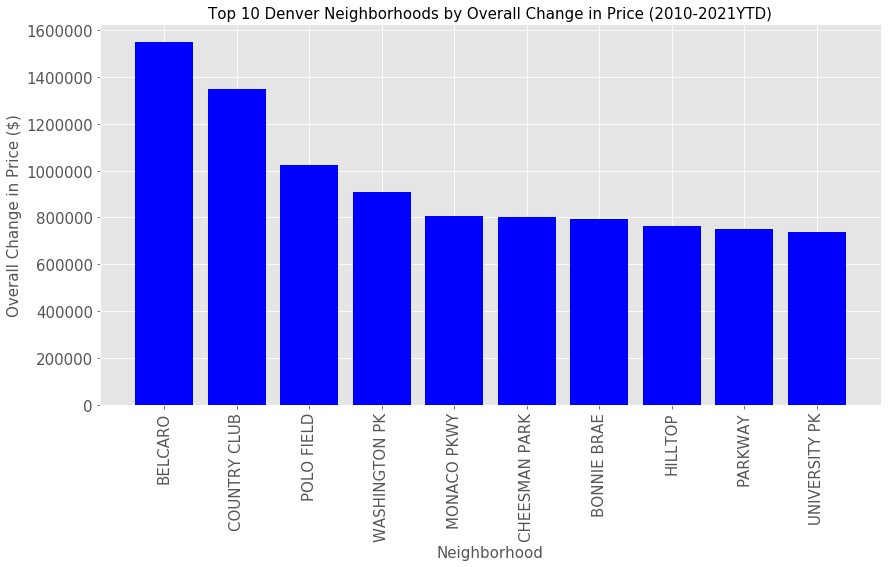

In [30]:
#PLot overall change price for top 10 neighborhoods
#Create x_axis
x_axis = np.arange(len(top10_denver_neigh_byPrice_df))

#Create tick locations
tick_locations = [value for value in x_axis]

#Create plot
plt.figure(figsize =(14, 7))
neigh_top10_price_change_plot = plt.bar(x_axis, top10_denver_neigh_byPrice_df['$Change'], color='blue')

#Plot ticks
plt.xticks(tick_locations, top10_denver_neigh_byPrice_df.index, rotation="vertical")

plt.title("Top 10 Denver Neighborhoods by Overall Change in Price (2010-2021YTD)", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel("Overall Change in Price ($)", fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/top_10_neighborhoods_barplot.png", bbox_inches='tight')

In [31]:
#Find the top 10 neighborhood by percent change in price
top10_denver_neigh_byPercent_df = denver_merged_df.set_index('Neighborhood').sort_values(by='%Change', ascending=False).head(10)
dfi.export(top10_denver_neigh_byPercent_df, "../Project/images/Tables/denver_top10_percent_neighborhoods_data.png")
top10_denver_neigh_byPercent_df

,2010_Sales_Price,2021_Sales_Price,$Change,%Change
Neighborhood,,,,
SWANSEA,40600,310000,269400,663
GLOBEVILLE,57000,375000,318000,557
SUN VALLEY,74000,375000,301000,406
SWANSEA (S),62500,312500,250000,400
SWANSEA (N),73000,345500,272500,373
E HIGHLAND,180000,805000,625000,347
CLAYTON,146250,590000,443750,303
VILLA PARK,104950,412000,307050,292
COLE,160000,616200,456200,285


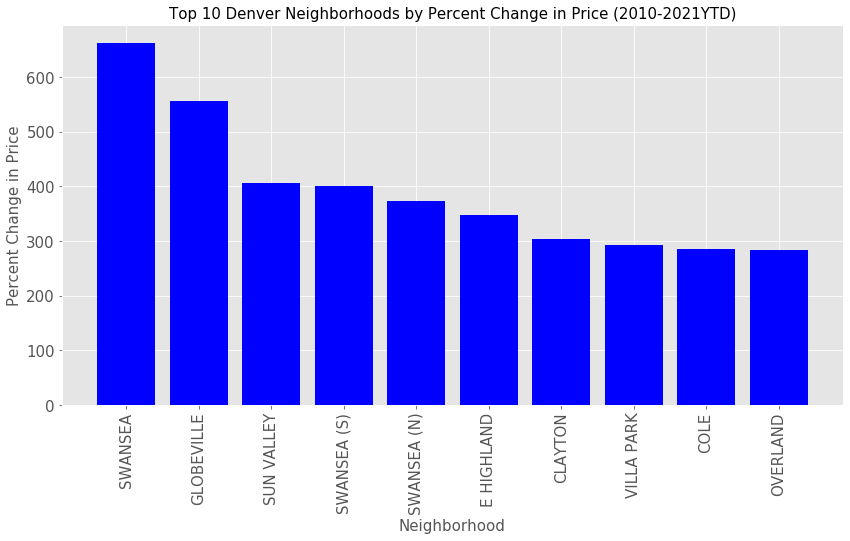

In [32]:
#PLot percent change price for top 10 neighborhoods
#Create x_axis
x_axis = np.arange(len(top10_denver_neigh_byPercent_df))

#Create tick locations
tick_locations = [value for value in x_axis]

#Create plot
plt.figure(figsize =(14, 7))
neigh_top10_percent_change_plot = plt.bar(x_axis, top10_denver_neigh_byPercent_df['%Change'], color='blue')

#Plot ticks
plt.xticks(tick_locations, top10_denver_neigh_byPercent_df.index, rotation="vertical")

plt.title("Top 10 Denver Neighborhoods by Percent Change in Price (2010-2021YTD)", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel("Percent Change in Price", fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/top_10_percentage_neighborhoods_barplot.png", bbox_inches='tight')

# # What were the bottom 10 neighborhoods in Denver by change in sales price over time (2010-2021)?

In [33]:
#Find the bottom 10 neighborhood by overall change in price
bottom10_denver_neigh_byPrice_df = denver_merged_df.set_index('Neighborhood').sort_values(by='$Change', ascending=True).head(10)
dfi.export(bottom10_denver_neigh_byPrice_df, "../Project/images/Tables/denver_bottom10_neighborhoods_data.png")
bottom10_denver_neigh_byPrice_df
#Note N Green Valley is showing a decrease of over $16MM and the 2010 price was over $17MM

,2010_Sales_Price,2021_Sales_Price,$Change,%Change
Neighborhood,,,,
N GREEN VALLEY,17113000,426000,-16687000,-97
POLO CLUB,5700000,4925000,-775000,-13
BREAKERS,436000,588500,152500,34
TAMARAC HILLS,317500,545100,227600,71
GOLDSMITH,285000,513750,228750,80
S COUNTRY CLUB,1175000,1405000,230000,19
HAMPDEN HTS E,267500,510000,242500,90
PARKFIELD,175000,419000,244000,139
GREEN VALLEY,158750,405000,246250,155


In [34]:
#Remove N Green Valley neighborhood for analysis
denver_merged_df2 = denver_merged_df[denver_merged_df.Neighborhood != 'N GREEN VALLEY']
bottom10_denver_neigh_byPrice_df = denver_merged_df2.set_index('Neighborhood').sort_values(by='$Change', ascending=True).head(10)
dfi.export(bottom10_denver_neigh_byPrice_df, "../Project/images/Tables/denver_bottom10_neighborhoods_updated_data.png")
bottom10_denver_neigh_byPrice_df

,2010_Sales_Price,2021_Sales_Price,$Change,%Change
Neighborhood,,,,
POLO CLUB,5700000,4925000,-775000,-13
BREAKERS,436000,588500,152500,34
TAMARAC HILLS,317500,545100,227600,71
GOLDSMITH,285000,513750,228750,80
S COUNTRY CLUB,1175000,1405000,230000,19
HAMPDEN HTS E,267500,510000,242500,90
PARKFIELD,175000,419000,244000,139
GREEN VALLEY,158750,405000,246250,155
SOUTHMOOR PARK,476680,726584,249904,52


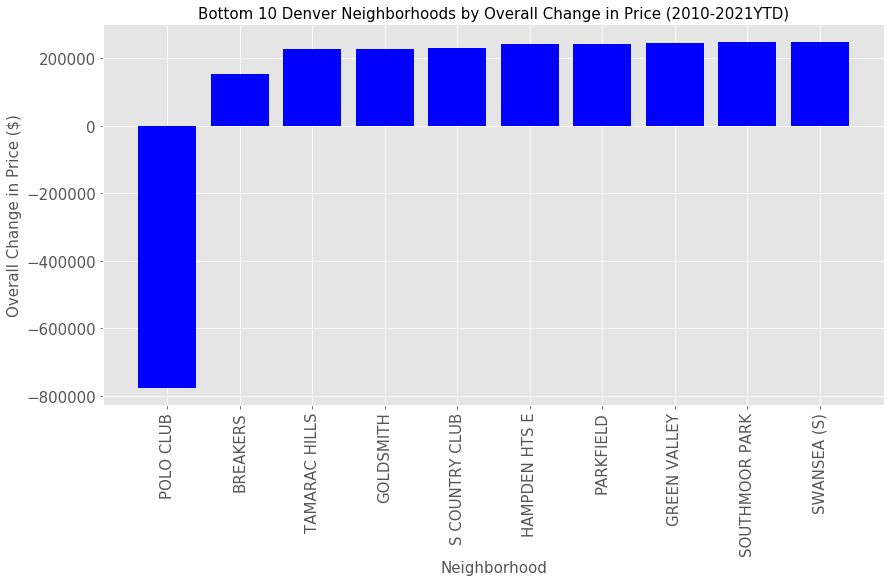

In [35]:
#PLot overall change in price for bottom 10 neighborhoods
#Create x_axis
x_axis = np.arange(len(bottom10_denver_neigh_byPrice_df))

#Create tick locations
tick_locations = [value for value in x_axis]

#Create plot
plt.figure(figsize =(14, 7))
neigh_bottom10_price_change_plot = plt.bar(x_axis, bottom10_denver_neigh_byPrice_df['$Change'], color='blue')

#Plot ticks
plt.xticks(tick_locations, bottom10_denver_neigh_byPrice_df.index, rotation="vertical")

plt.title("Bottom 10 Denver Neighborhoods by Overall Change in Price (2010-2021YTD)", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel("Overall Change in Price ($)", fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/bottom_10_neighborhoods_barplot.png", bbox_inches='tight')

In [36]:
#Find the bottom 10 neighborhoods by percent change in price
bottom10_denver_neigh_byPercent_df = denver_merged_df2.set_index('Neighborhood').sort_values(by='%Change', ascending=True).head(10)
dfi.export(bottom10_denver_neigh_byPercent_df, "../Project/images/Tables/denver_bottom10_percent_neighborhoods_data.png")
bottom10_denver_neigh_byPercent_df

,2010_Sales_Price,2021_Sales_Price,$Change,%Change
Neighborhood,,,,
POLO CLUB,5700000,4925000,-775000,-13
S COUNTRY CLUB,1175000,1405000,230000,19
BREAKERS,436000,588500,152500,34
PINEHURST,650000,975000,325000,50
N CHERRY CREEK,1400000,2125000,725000,51
CHERRY POINT,495660,752500,256840,51
SOUTHMOOR PARK,476680,726584,249904,52
N POLO CLUB,1000000,1672750,672750,67
TAMARAC HILLS,317500,545100,227600,71


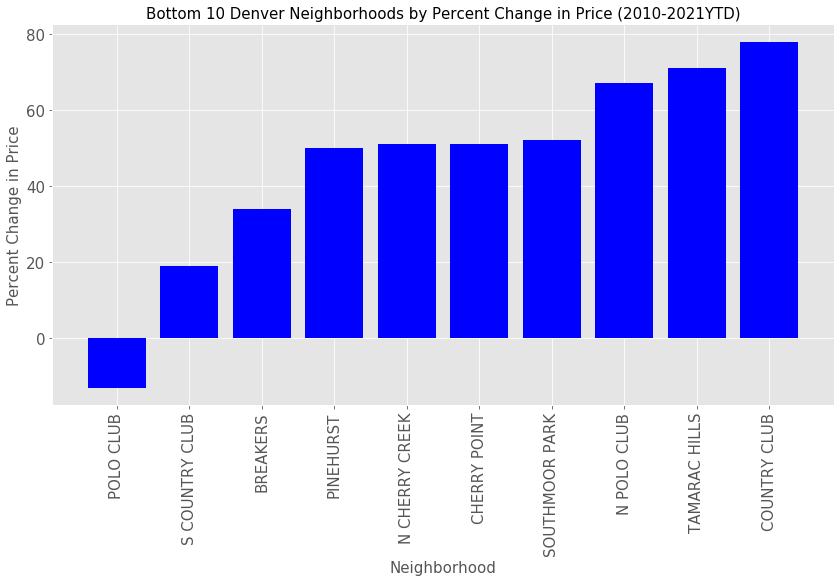

In [37]:
#PLot change in percent for bottom 10 neighborhoods
#Create x_axis
x_axis = np.arange(len(bottom10_denver_neigh_byPercent_df))

#Create tick locations
tick_locations = [value for value in x_axis]

#Create plot
plt.figure(figsize =(14, 7))
neigh_bottom10_percent_change_plot = plt.bar(x_axis, bottom10_denver_neigh_byPercent_df['%Change'], color='blue')

#Plot ticks
plt.xticks(tick_locations, bottom10_denver_neigh_byPercent_df.index, rotation="vertical")

plt.title("Bottom 10 Denver Neighborhoods by Percent Change in Price (2010-2021YTD)", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel("Percent Change in Price", fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/bottom_10__percentage_neighborhoods_barplot.png", bbox_inches='tight')

# Predict future sales prices for US

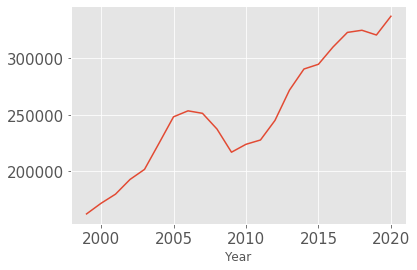

In [38]:
#Create new data frame with only US sales prices and year
US_mov_avg = usdf[['Year','US']].set_index('Year')
US_mov_avg['US'] = US_mov_avg['US'].astype(int)
US_mov_avg['US'].plot()

In [39]:
#Add simple moving averages to data frame for plotting
US_mov_avg['2-Year_SMA'] = US_mov_avg.US.rolling(2, min_periods=1).mean()
US_mov_avg['3-Year_SMA'] = US_mov_avg.US.rolling(3, min_periods=1).mean()
US_mov_avg['5-Year_SMA'] = US_mov_avg.US.rolling(5, min_periods=1).mean()

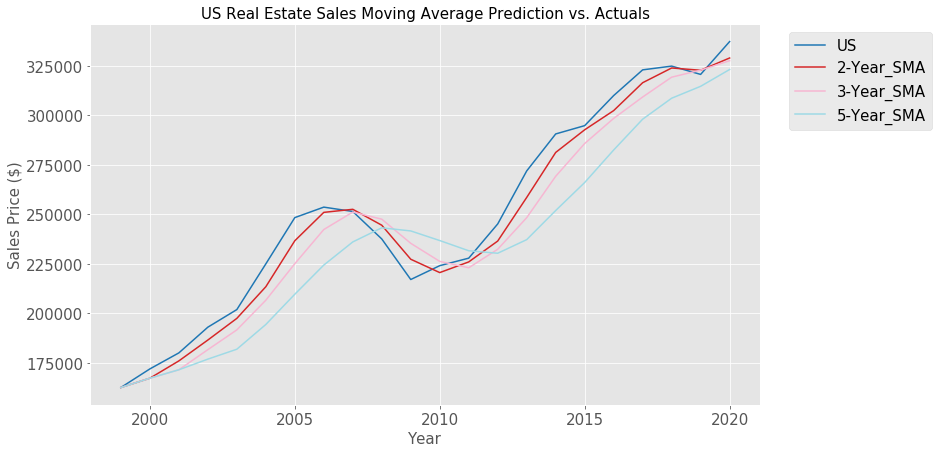

In [40]:
#Create plot to compare
plt.style.use('ggplot')
percentage_year_plot = US_mov_avg.plot.line(figsize =(12,7),cmap='tab20')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales Price ($)', fontsize=15)
plt.title('US Real Estate Sales Moving Average Prediction vs. Actuals', fontsize=15)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper center', fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/US_moving_average_plot.png", bbox_inches='tight')

In [41]:
#Create forecasted list for 2-Year moving average
X1 = 320700
X2 = 337300
year = [2020]
y = 2020
forecast = [337300]
for i in range(5):
    y = y + 1
    year.append(y)
    i = (X1+X2)/2
    forecast.append(i)
    X1 = X2
    X2 = i
    
forecast

[337300, 329000.0, 333150.0, 331075.0, 332112.5, 331593.75]

In [42]:
#Create forecasted dataframe and concat to actual data for plotting
forecast_df = pd.DataFrame({'Forecast': forecast, 'Year' : year}).set_index('Year')
forecast_df2 = pd.concat([US_mov_avg, forecast_df]).drop(columns=['2-Year_SMA', '3-Year_SMA', '5-Year_SMA'])
dfi.export(forecast_df2.tail(6), "../Project/images/Tables/US_forecast_data.png")
forecast_df2.tail(6)

,US,Forecast
Year,,
2020,NaN,337300.00
2021,NaN,329000.00
2022,NaN,333150.00
2023,NaN,331075.00
2024,NaN,332112.50
2025,NaN,331593.75


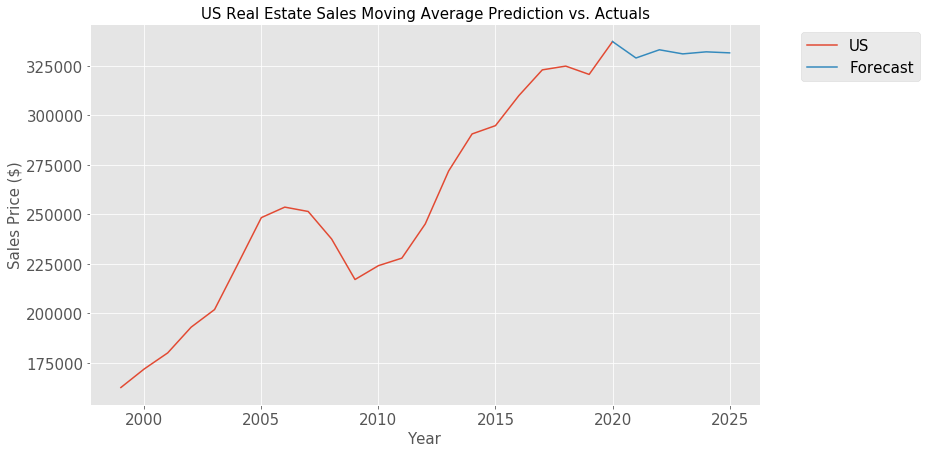

In [43]:
#Create plot to compare
plt.style.use('ggplot')
percentage_year_plot = forecast_df2.plot.line(figsize =(12,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales Price ($)', fontsize=15)
plt.title('US Real Estate Sales Moving Average Prediction vs. Actuals', fontsize=15)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper center', fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig("../Project/images/Plots/US_moving_average_forecast_plot.png", bbox_inches='tight')
